In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [9]:
#Dataset uploaded
df = pd.read_excel('Cleaned_Insurance_Dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   incident_type       1000 non-null   object
 1   collision_type      822 non-null    object
 2   incident_severity   1000 non-null   object
 3   total_claim_amount  1000 non-null   int64 
 4   injury_claim        1000 non-null   int64 
 5   property_claim      1000 non-null   int64 
 6   vehicle_claim       1000 non-null   int64 
 7   fraud_reported      1000 non-null   object
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [10]:
df.shape

(1000, 8)

In [11]:
df = df.dropna(how = 'any')
df

,incident_type,collision_type,incident_severity,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,Multi-vehicle Collision,Side Collision,Major Damage,64300,6430,6430,51440,Y
1,Multi-vehicle Collision,Rear Collision,Total Loss,60190,4630,9260,46300,Y
2,Single Vehicle Collision,Front Collision,Total Loss,91520,8320,16640,66560,Y
3,Single Vehicle Collision,Rear Collision,Minor Damage,77000,15400,7700,53900,Y
4,Multi-vehicle Collision,Rear Collision,Total Loss,98670,15180,15180,68310,Y
...,...,...,...,...,...,...,...,...
995,Single Vehicle Collision,Side Collision,Minor Damage,95810,14740,14740,66330,N
996,Single Vehicle Collision,Side Collision,Major Damage,62640,10440,10440,41760,N
997,Single Vehicle Collision,Rear Collision,Minor Damage,61740,6860,6860,48020,N
998,Single Vehicle Collision,Rear Collision,Minor Damage,77880,7080,14160,56640,N


In [12]:
print (df.corr())

                    total_claim_amount  injury_claim  property_claim  \
total_claim_amount            1.000000      0.644030        0.651739   
injury_claim                  0.644030      1.000000        0.262772   
property_claim                0.651739      0.262772        1.000000   
vehicle_claim                 0.942539      0.449316        0.464623   

                    vehicle_claim  
total_claim_amount       0.942539  
injury_claim             0.449316  
property_claim           0.464623  
vehicle_claim            1.000000  


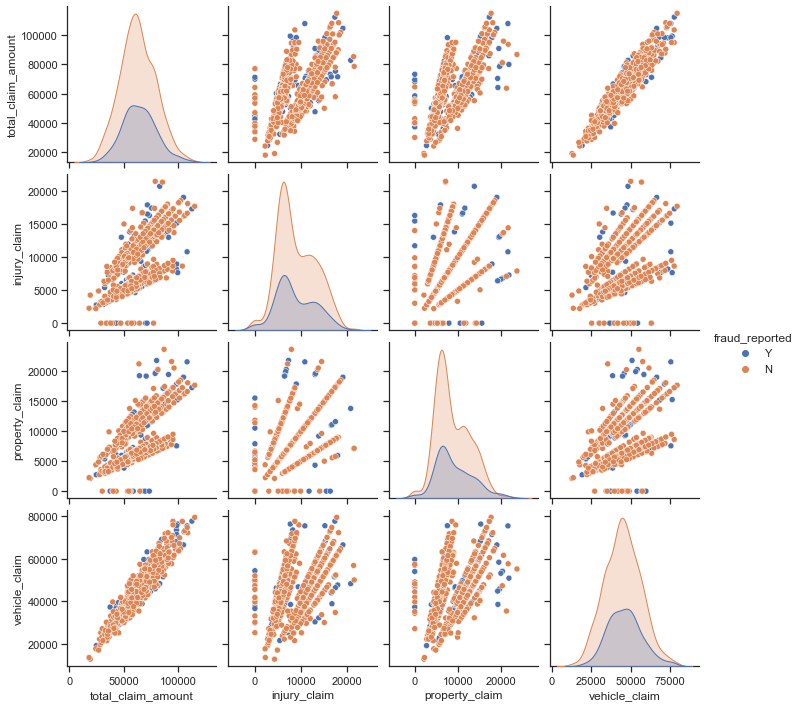

In [13]:
import seaborn as sns

sns.set_theme(style="ticks")
sns.pairplot(df, hue="fraud_reported")

In [14]:
# Convert x column to numpy array
X = df.loc[:, ['total_claim_amount']].values

In [15]:
X.shape

(822, 1)

In [16]:
y = df.loc[:, 'vehicle_claim'].values

In [17]:
y.shape

(822,)

In [18]:
reg = LinearRegression(fit_intercept=True)

In [19]:
reg.fit(X,y)

LinearRegression()

##Data Visualization

In [20]:
#Predict for One Observation
reg.predict(X[0].reshape(-1,1))

array([46153.94365207])

In [21]:
#Predict for Multiple Observations at Once
reg.predict(X[0:10])

array([46153.94365207, 43412.30426293, 64311.46778157, 54625.67607105,
       69080.98642691, 68740.78299906, 42885.32248254, 43545.71737189,
       43152.14870046, 39016.34232269])

In [22]:
#Measuring Model Performance
score = reg.score(X, y)
print(score)

0.888379589112896


In [23]:
reg.coef_

array([0.66706554])

In [24]:
reg.intercept_

3261.6291213023214

In [25]:
m = reg.coef_[0]

b = reg.intercept_

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

formula: y = 0.67x + 3261.63


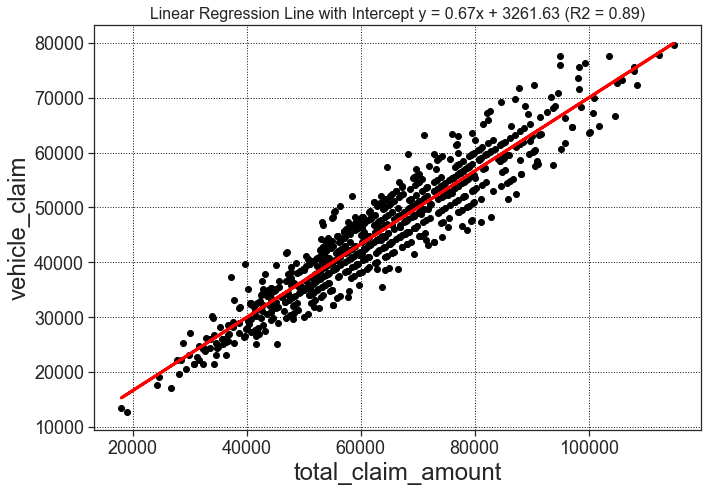

In [26]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='black');
ax.plot(X, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('total_claim_amount', fontsize = 24)
ax.set_ylabel('vehicle_claim', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(m, b, score), fontsize = 16 )
fig.tight_layout()


In [27]:
# Model with Intercept (like earlier in notebook)
reg_inter = LinearRegression(fit_intercept=True)
reg_inter.fit(X,y)
predictions_inter = reg_inter.predict(X)
score_inter = reg_inter.score(X, y)

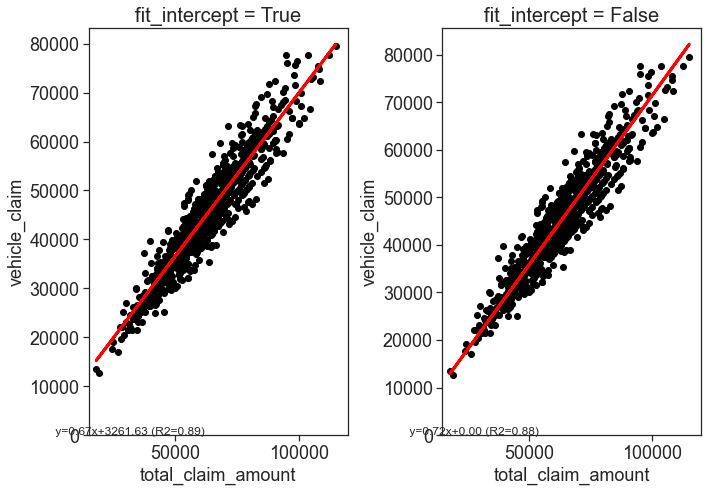

In [28]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7));

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]): 
    model.fit(X,y)
    predictions = model.predict(X)
    score = model.score(X, y)
    m = model.coef_[0]
    b = model.intercept_
    
    ax[index].scatter(X, y, color='black');
    ax[index].plot(X, model.predict(X), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 18)
    ax[index].set_xlabel('total_claim_amount', fontsize = 18)
    ax[index].set_ylabel('vehicle_claim', fontsize = 18)
    ax[index].set_xlim(left = 15000)
    ax[index].set_ylim(bottom = 0)
    
    ax[index].text(90, 100, " y={:.2f}x+{:.2f} (R2={:.2f})".format(m, b, score), fontsize = 12)

ax[0].set_title('fit_intercept = True', fontsize = 20)   
ax[1].set_title('fit_intercept = False',  fontsize = 20)    
fig.tight_layout()